# Lab 5: Constrained optimization: equality and inequality constraints

## POL RIBA MOSOLL (20179725) & JORDI SEGURA PONS (2128790)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import math as math
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import random
# Python 3.9!
from QPGC import QPGenericConstraints #QPGenericConstraints(G, g, A, C, b, d)
%matplotlib inline


In [2]:
def generate_data(n, is_separable=True):
    """Generates n samples of data of 2 classes with a mean(m_i) and a variance (s_i). 

    Args:
        n (int): The size of data
        is_separable (bool, optional): If data can be separated by SVM. Defaults to True.
        
    Returns:
        X,y: Coordinates of positive and negative samples, as well as its labels.
    """

    m1 = [0.,0.]
    s1 = [[1, -0.9] ,[-0.9, 1]]
    if is_separable:
        m2 = [3., 6.]
        s2 = [[1,0], [0,1]]
    else:
        m2 = [1., 2.] 
        s2 = [[1,0], [0,1]]
    
    positive_class = np.random.multivariate_normal(m1, s1, n)
    negative_class = np.random.multivariate_normal(m2, s2, n)

    X = np.concatenate((positive_class, negative_class)).T
    y = np.concatenate((np.ones(n), -1*np.ones(n)))

    return X, y

In [3]:
def create_matrices(X, y, K):
    """Create the matrices needed for the QPGC algorithm given an input X and y and a parameter K.

    Args:
        X (np.array): Coordinates of data
        y (np.array): Labels of data
        K (int): Penalty constraint. From ML: C of obj.function 

    Returns:
        G,g,A,b,C,d: The constraints for the optimization problem.
    """
    n = X.shape[1] # Number of samples
    p = 1 # Shape of A
    A = y.reshape(n, p) #  A.T * x = b
    b = np.zeros(p)    
    C = np.concatenate((np.eye(n), -np.eye(n)), axis = 1)
    d = np.concatenate((np.zeros(n), -K*np.ones(n)))     
    Y = np.diag(y) 
    G = np.dot(np.dot(Y, X.T), np.dot(X, Y)) 
    g = -np.ones(n) # Normal Distribution

    return G, g, A, b, C, d

In [4]:
def compute_hyper(X, y, alpha, K):
    """Computes the hyperplane

    Args:
        X (np.array): Coordinates of data
        y (np.array): Labels of data
        alpha (np.array): Lagrangian multipliers.
        K (int): Penalty constraint. From ML: C of obj.function 

    Returns:
        w, b: The parameters of the hyperplane
    """
    w = np.sum(alpha*y*X, axis=1)
    b = [y[i]-np.dot(w.T, X[:,i]) for i in range(0, alpha.shape[0]) if alpha[i]>0 and alpha[i]<K]

    return w,np.median(b)
    

### Experiment 1: Separable data, 2 points per class

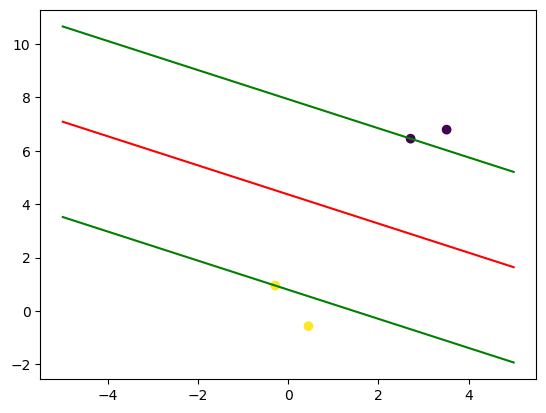

In [5]:
# Generate dataset
K = 1 
points_class = 2
X, y = generate_data(points_class)

# Generate matrices
G, g, A, b, C, d = create_matrices(X, y, K)

# Compute alpha 
alpha = QPGenericConstraints(G, g, A, C, b, d)

# Compute hyperplane
w, b = compute_hyper(X, y, alpha, K)

# Plot points, margins and hyperplane
linespace = np.linspace(-5, 5, 100)

plt.scatter(X[0,:], X[1,:], c=y)
plt.plot(linespace, -(w[0]*linespace + b) / w[1], 'r')
plt.plot(linespace, -(w[0]*linespace + b+1) / w[1], 'g')
plt.plot(linespace, -(w[0]*linespace + b-1) / w[1], 'g')
plt.show()

See how the support vectors touch perfectly the points, and at the same time we are maximizing the possible distance between them. It works correctly with a K=1 and 2 points per class

### Experiment 2: Separable data, 50 points per class

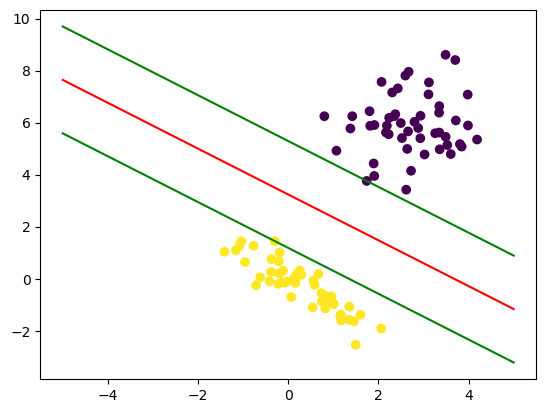

In [6]:
# Generate dataset
K = 1 
points_class = 50
X, y = generate_data(points_class)

# Generate matrices
G, g, A, b, C, d = create_matrices(X, y, K)

# Compute alpha 
alpha = QPGenericConstraints(G, g, A, C, b, d)

# Compute hyperplane
w, b = compute_hyper(X, y, alpha, K)

# Plot points, margins and hyperplane
linespace = np.linspace(-5, 5, 100)

plt.scatter(X[0,:], X[1,:], c=y)
plt.plot(linespace, -(w[0]*linespace + b) / w[1], 'r')
plt.plot(linespace, -(w[0]*linespace + b+1) / w[1], 'g')
plt.plot(linespace, -(w[0]*linespace + b-1) / w[1], 'g')
plt.show()

Again, even with 50 points for each class, it separates perfectly and it precisely defines the support vectors maximizing again the distance between the 2 nearest points from each class. 


### Experiment 3: Separable data, 50 points per class. K variable

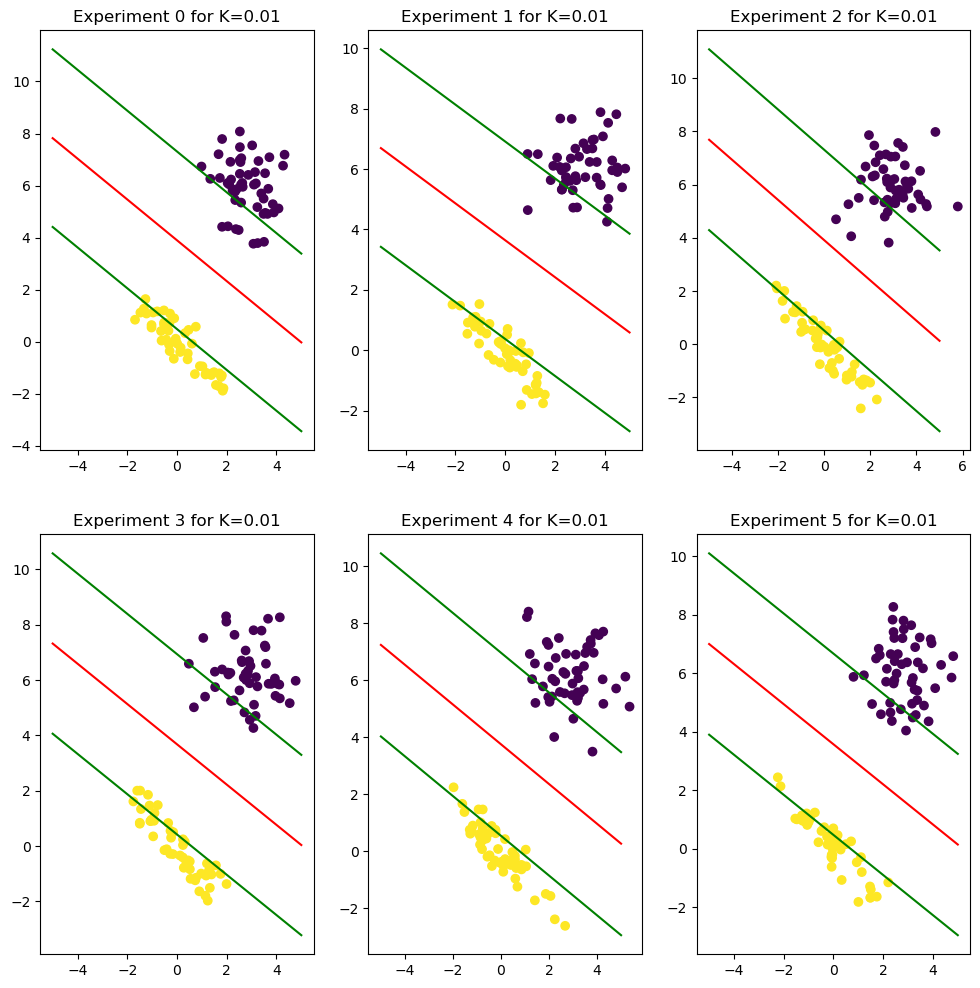

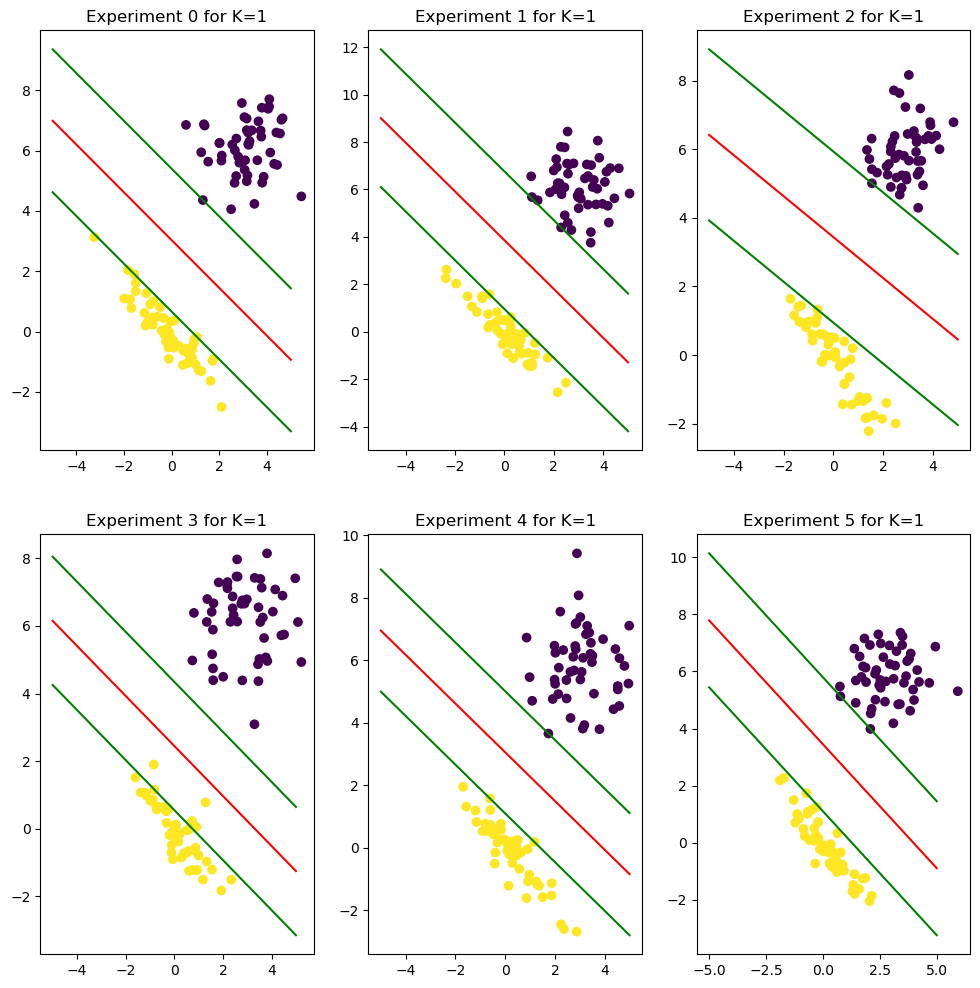

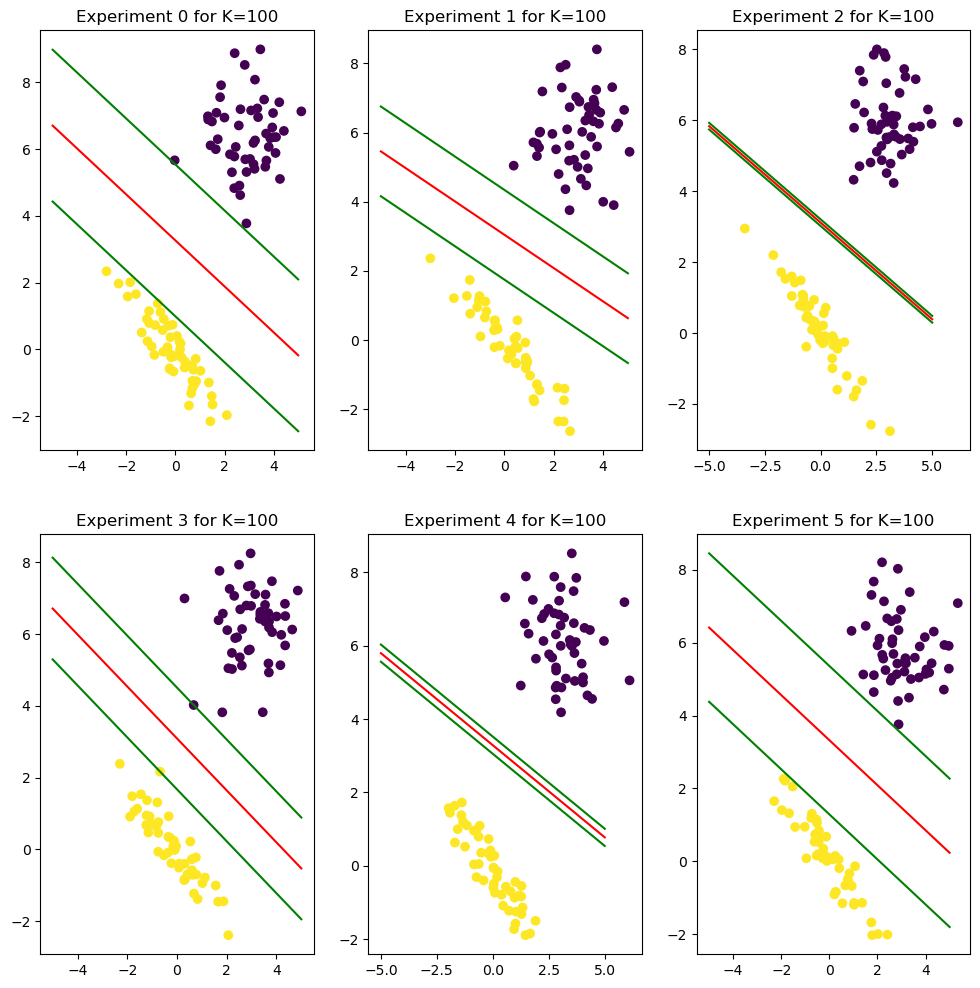

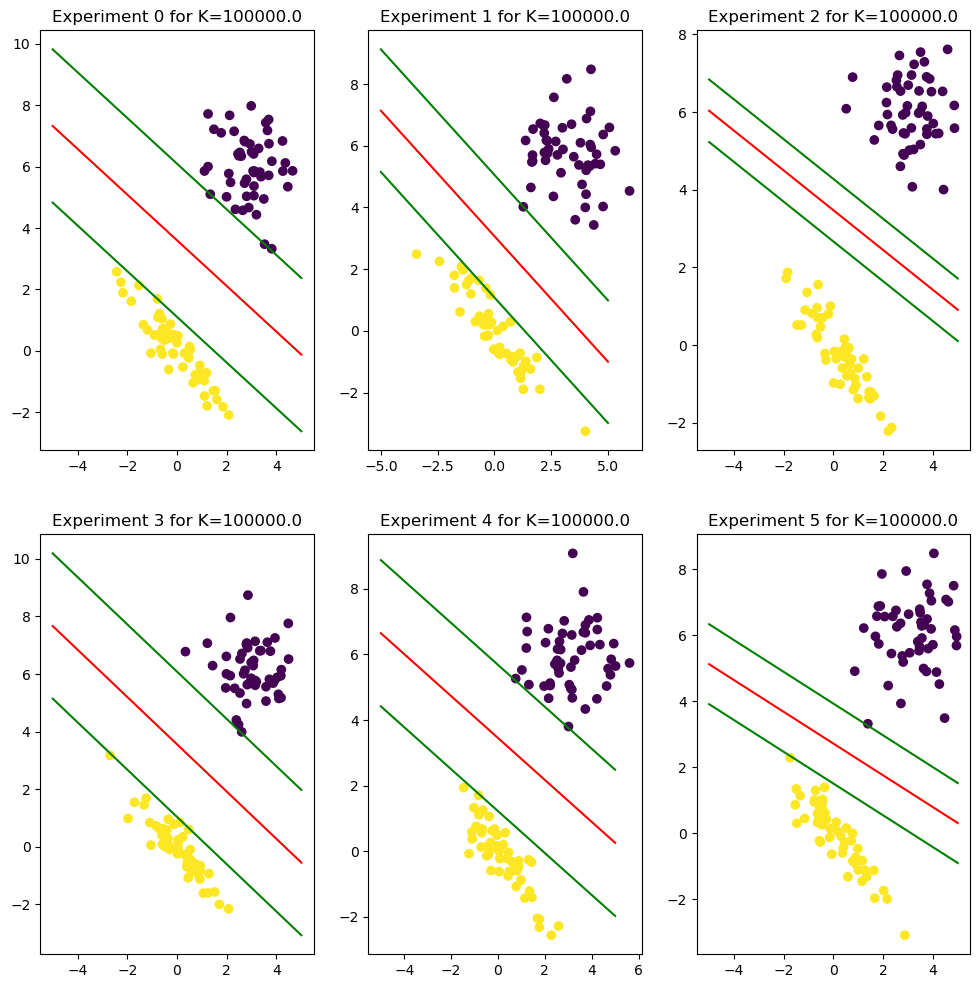

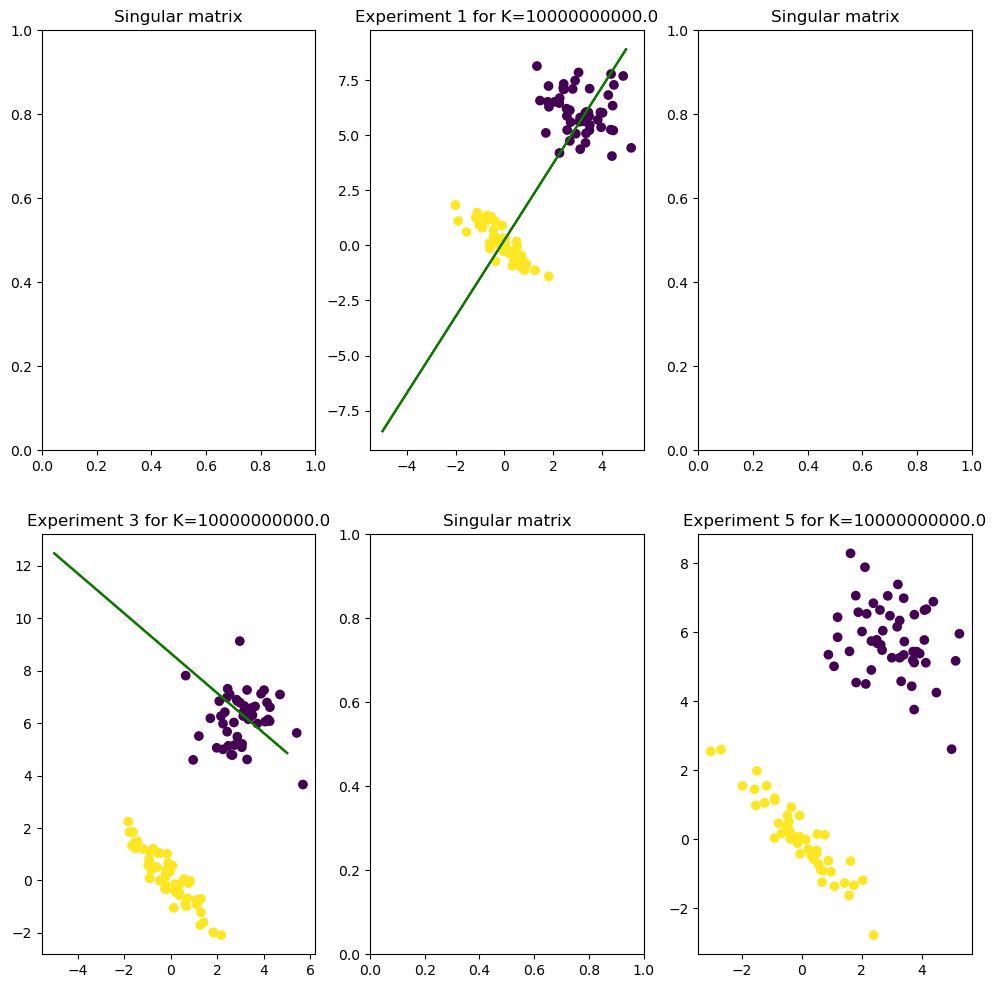

In [7]:
# Set number of experiments to run for each value of K
num_experiments = 6

# Generate dataset
for K in [0.01, 1, 100, 1e5, 1e10]:
    # Create figure with 3x3 grid of subplots
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,12))
    ax = ax.flatten()
    for i in range(num_experiments):
        try:
            points_class = 50
            X, y = generate_data(points_class)

            # Generate matrices
            G, g, A, b, C, d = create_matrices(X, y, K)

            # Compute alpha 
            alpha = QPGenericConstraints(G, g, A, C, b, d)

            # Compute hyperplane
            w, b = compute_hyper(X, y, alpha, K)
            
            # Plot points, margins and hyperplane
            linespace = np.linspace(-5, 5, 100)

            ax[i].scatter(X[0,:], X[1,:], c=y)
            ax[i].plot(linespace, -(w[0]*linespace + b) / w[1], 'r')
            ax[i].plot(linespace, -(w[0]*linespace + b+1) / w[1], 'g')
            ax[i].plot(linespace, -(w[0]*linespace + b-1) / w[1], 'g')
            ax[i].set_title(f'Experiment {i} for K={K}')
        except Exception as e:
            ax[i].set_title(f'{e}')

    # Show figure with all subplots
    plt.show()


See how the experiments are repeated 6 times for each value of K, this gives us a most reliable result. The question to answer is, does the value of K influence the solution of we obtain?

The answer is pretty obvious, yes. For the smallest value of K, $K=0.01$, we can see how our support vectors are very permissive and, therefore, we do not penalize misclassification. As soon as we increase the value to 1, we can see from this value on, a perfect classification. For a value equal to 1, the margin is also maximized, something that is lost with higher values.
For example, with $K=100$ we start observing a perfect classification but not optimal support vectors.

This is absolutly lost with a $K=10e^{10}$, which not only do not allow us to generate matrices because of non-singularity, but we can also observe how we are not able to compute the correct support vectors nor a explainable margin.

### Experiment 4: Non-separable data, 50 points per class. K variable

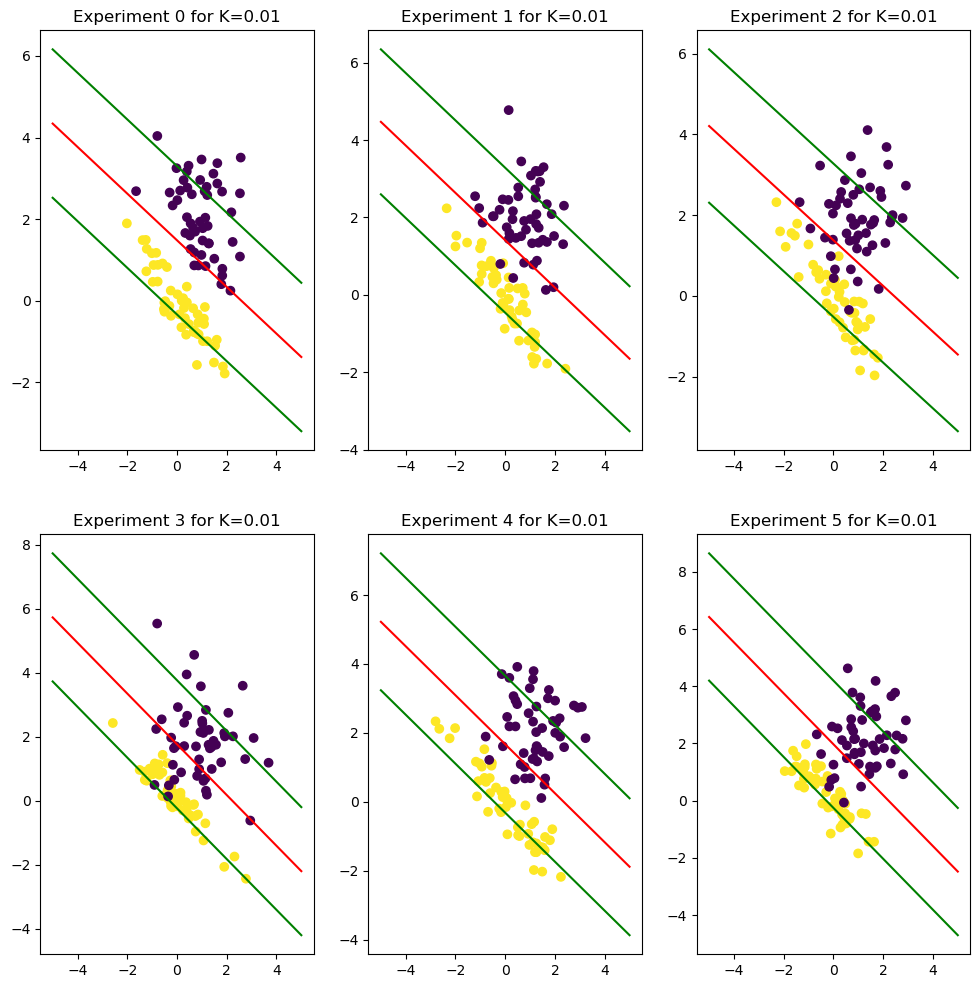

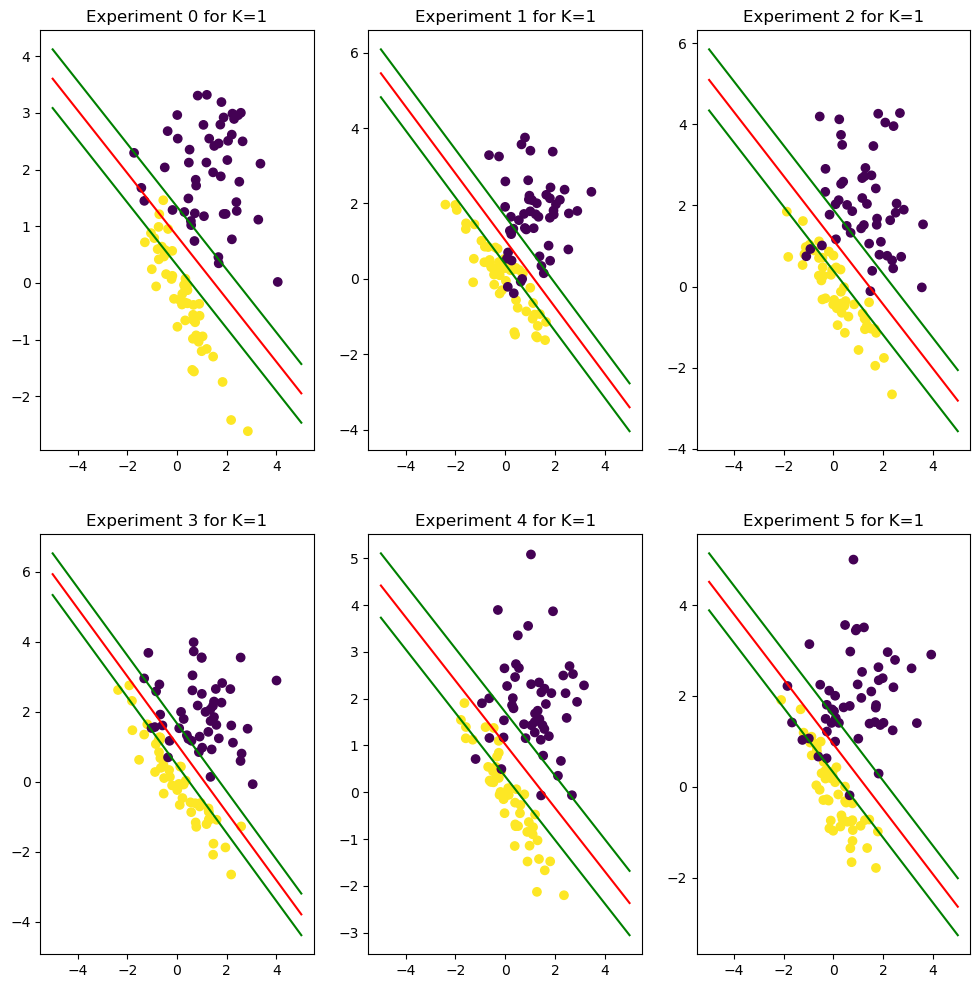

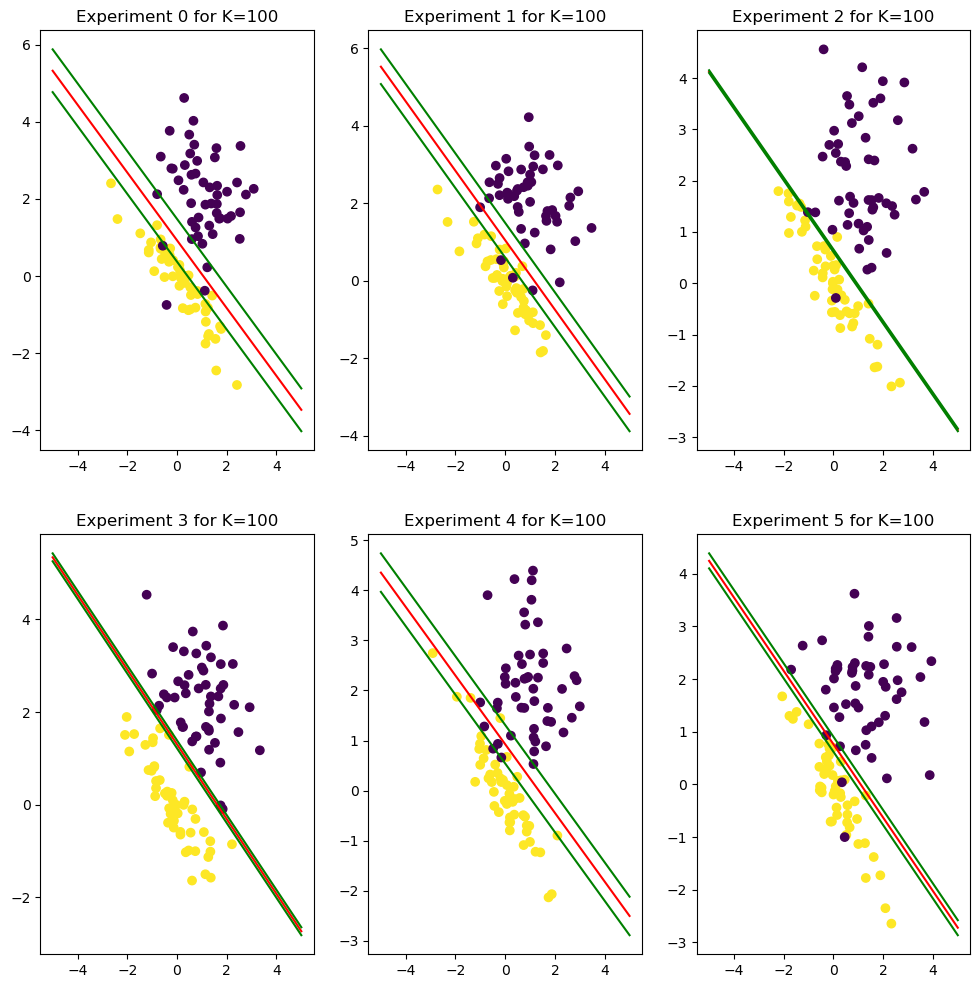

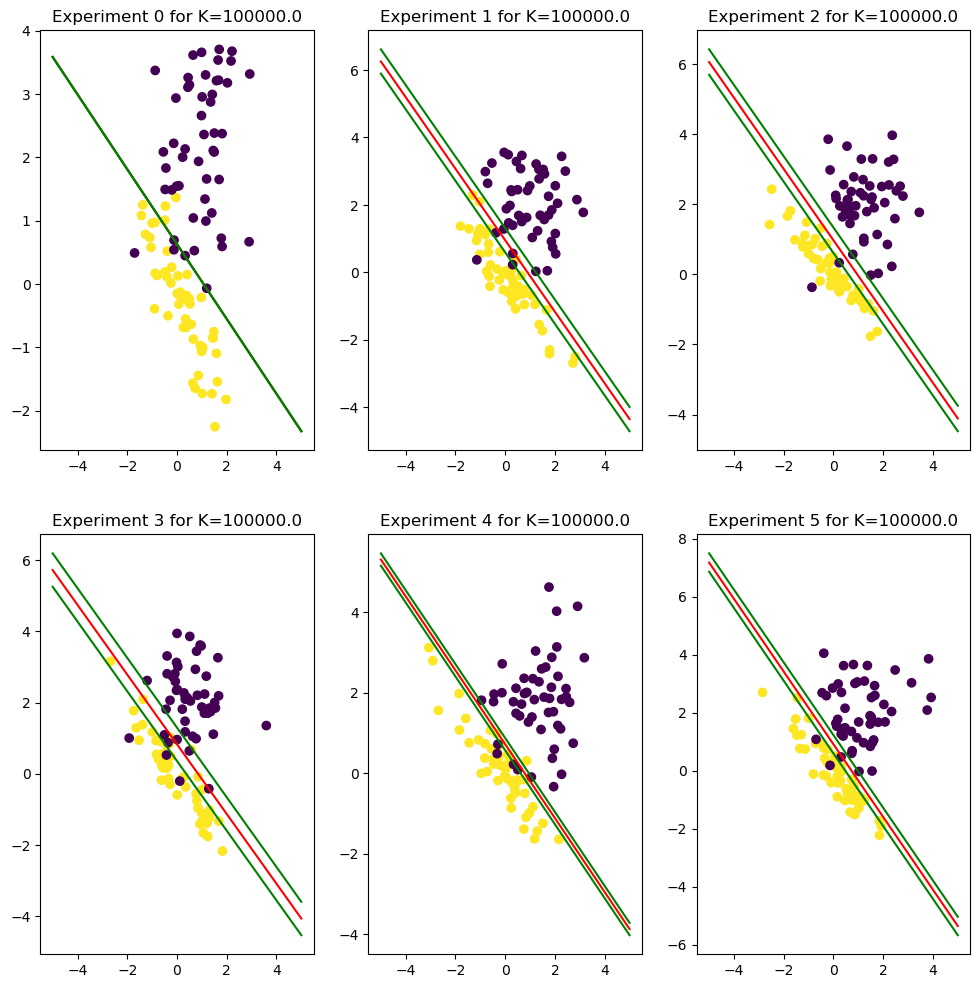

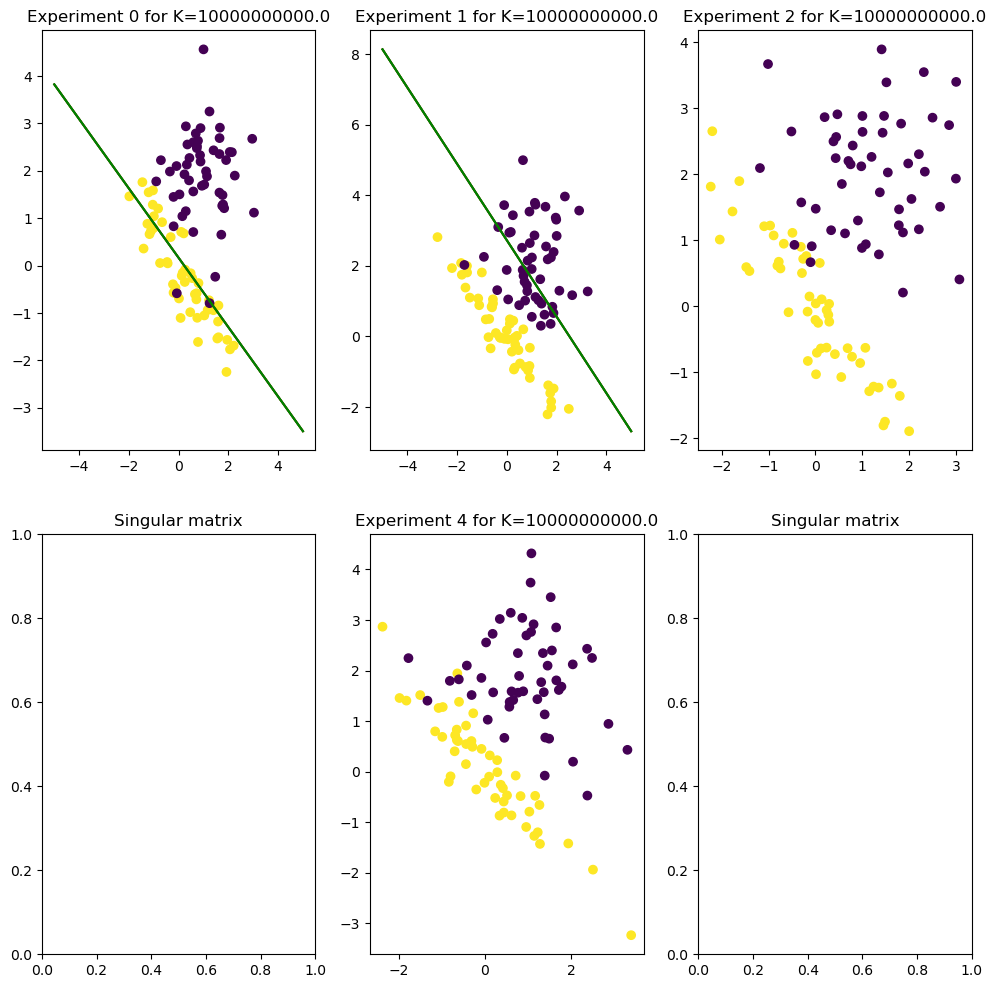

In [8]:
# Set number of experiments to run for each value of K
num_experiments = 6

# Generate dataset
for K in [0.01, 1, 100, 1e5, 1e10]:
    # Create figure with 3x3 grid of subplots
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,12))
    ax = ax.flatten()
    for i in range(num_experiments):
        try:
            points_class = 50
            X, y = generate_data(points_class, is_separable=False)

            # Generate matrices
            G, g, A, b, C, d = create_matrices(X, y, K)

            # Compute alpha 
            alpha = QPGenericConstraints(G, g, A, C, b, d)

            # Compute hyperplane
            w, b = compute_hyper(X, y, alpha, K)
            
            # Plot points, margins and hyperplane
            linespace = np.linspace(-5, 5, 100)

            ax[i].scatter(X[0,:], X[1,:], c=y)
            ax[i].plot(linespace, -(w[0]*linespace + b) / w[1], 'r')
            ax[i].plot(linespace, -(w[0]*linespace + b+1) / w[1], 'g')
            ax[i].plot(linespace, -(w[0]*linespace + b-1) / w[1], 'g')
            ax[i].set_title(f'Experiment {i} for K={K}')
        except Exception as e:
            ax[i].set_title(f'{e}')

    # Show figure with all subplots
    plt.show()


In this case, we have non-separable data, wich we know that without a kernel we will not be able to separate.

Although this, the soft-SVM we have coded with this $K$ penalization, with the same values as before, it gives us interesting results. First of all, we can see how for smaller values we are very tolerant to misclassifications, which can be observed by width margins and some mistakes done by the algorithm, i.e: $K=0.01$ or $K=1$.

On the other hand, once we increase the value of $K$, we can start seeing how the margin decreases making the misclassification errors decrease too. Logically, the smaller the width of the margin, the higher the accuracy in this case, but we will be very exposed to variance. See for instance $K=100000$, where the support vectors seem just a line, they are overlapped because they are penalizing a lot the mistakes.

Again, with huge values of K our model became unstable!

# Lab 6: Stochastic gradient descent for SVM

In [9]:
# Random multivariate normal varibles
X, y = generate_data(100)
K = 100

### Experiment 1. Classical stochastic gradient descent

In [10]:
# We define the Stochastic Support Vector Machine Algorithm

def Stoch_SupportVectorMachine(x, y, itera = 200, mu0 = 100, alpha = 0.01):
    """
    Trains a support vector machine (SVM) classifier using stochastic gradient descent (SGD).
    
    Parameters
    ----------
    x : ndarray
        The training data, with shape (n_features, n_samples).
    y : ndarray
        The labels for the training data, with shape (n_samples,)
    itera : int, optional
        The number of iterations to perform, by default 200.
    mu0 : int, optional
        The initial value of the learning rate, by default 100.
    alpha : float, optional
        The regularization parameter, by default 0.01.
        
    Returns
    -------
    dict
        A dictionary containing the learned model parameters 'w' (the weights), 'b' (the bias),
        'iter' (the number of iterations performed), and 'acum' (the list of objective function
        values at each iteration).
    """
    # We initilaize the parameters
    n = x.shape[0]
    m = len(y)
    b = 0
    zer = np.zeros(n)
    n_iter = 0
    check = []
    acum_fun = []
    mu = mu0 
     
    for i in range(1, itera + 1):
        
        order = np.arange(0, m)
        np.random.shuffle(order)
        zer_old = zer
        b_old = b
        mu = mu + i
        trans = 1 / mu
        
        # For every batch
        for batch in order:
            
            auxiliar = (y[batch] * (zer.T.dot(x[:, batch:(batch+1)]) + b)) < 1
            zer = zer - trans * (alpha * zer - auxiliar * y[batch] * X[:, batch:(batch+1)])
            b = b - trans * (auxiliar * - y[batch])
        
        Res = alpha/2 * zer.T.dot(zer) + np.sum(np.maximum(np.zeros(y.shape), 1 - y*(zer.T.dot(x) + b)))
        acum_fun.append(Res[0,0])
        check = (np.linalg.norm(zer_old - zer))   
        
        # Precision Treshold
        if (check < 0.000001): 
            n_iter = i
            break
            
    n_iter = i
    
    return {'w': zer[:, 0], 'b': b[0], "iter": itera, "acum": acum_fun}

Number of Iterations: 200


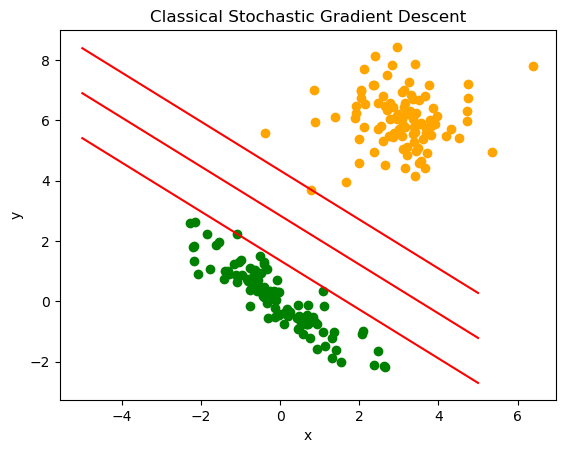

In [11]:
# Plot

z = Stoch_SupportVectorMachine(x = X, y = y, itera = 200, mu0 = 10, alpha =0.01)

# Linspace
linx = np.linspace(-5, 5)
zer = z['w']
b = z['b']
liny = -zer[0] / zer[1] * linx - (b) / zer[1]
# Support vectors
linv1 = -zer[0] / zer[1] * linx - (b+1) / zer[1]
linv2 = -zer[0] / zer[1] * linx - (b-1) / zer[1]
# Plot
plt.plot(X.T[:K, 0], X.T[:K, 1], 'o', color = 'green')
plt.plot(X.T[K:, 0], X.T[K:, 1], 'o', color = 'orange')
plt.plot(linx, liny, color = 'red')
plt.plot(linx, linv1, color = 'red')
plt.plot(linx, linv2, color = 'red')

plt.xlabel('x') 
plt.ylabel('y') 
plt.title("Classical Stochastic Gradient Descent")
print("Number of Iterations:", z["iter"])

As we can see in the above plot, the Classical Stochastic Descent Method finds an optimal solution for our problem in 200 iterations, having mu0 = 10 and alpha = 0.01. If we try different values for the last two parameters we could probably find even better results.
We could create a hyper parameter tunning function, or just try random different values combinations.

Number of iterations = 200 with Alpha = 0.1 mu0 = 10
Value of f(w, b): 2.9820753241506535 

Number of iterations = 200 with Alpha = 0.001 mu0 = 10
Value of f(w, b): 0.00039251971196715415 

Number of iterations = 200 with Alpha = 0.1 mu0 = 100
Value of f(w, b): 3.007689477529758 

Number of iterations = 200 with Alpha = 0.001 mu0 = 100
Value of f(w, b): 0.5833605227944957 

Number of iterations = 200 with Alpha = 0.1 mu0 = 1000
Value of f(w, b): 3.749490912369626 

Number of iterations = 200 with Alpha = 0.001 mu0 = 1000
Value of f(w, b): 1.87379090995733 



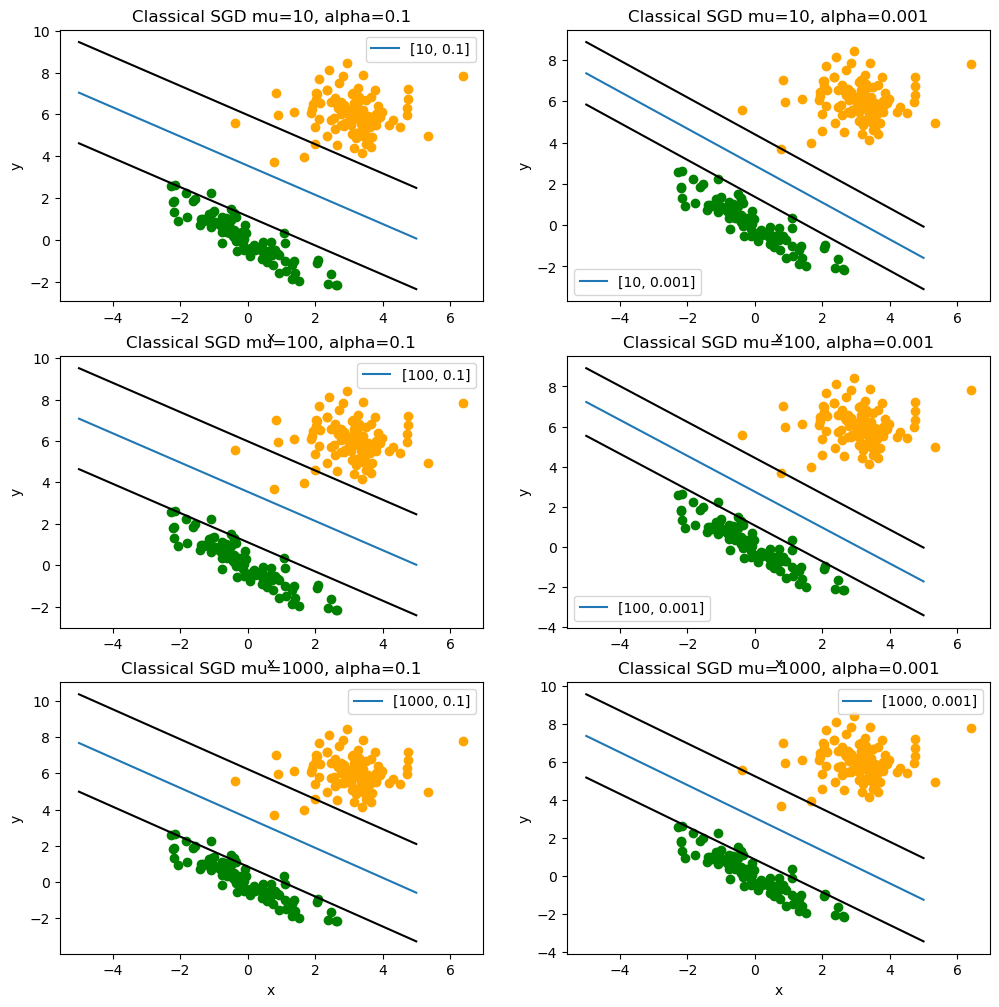

In [12]:
# Let's try with different values for mu and alpha

mu0s = [10, 100, 1000]
alphas = [0.1, 0.001]

# Create figure with 3x3 grid of subplots
fig, ax = plt.subplots(nrows=len(mu0s), ncols=len(alphas), figsize=(12,12))
ax = ax.flatten()
# Loop for comparing each mu and alpha
k = 0

for i in range(len(mu0s)):
    
    for j in range(len(alphas)):
        z = Stoch_SupportVectorMachine(x = X, y = y, itera = 200, mu0 = mu0s[i], alpha = alphas[j])
        
        # Print
        print("Number of iterations =", z["iter"], "with Alpha =", alphas[j], "mu0 =" , mu0s[i])
        print("Value of f(w, b):", z["acum"][-1], "\n")
        
        # Linspaces
        linx = np.linspace(-5, 5)
        zer = z['w']
        b = z['b']
        liny = -zer[0] / zer[1] * linx - (b) / zer[1]
        linv1 = -zer[0] / zer[1] * linx - (b+1) / zer[1]
        linv2 = -zer[0] / zer[1] * linx - (b-1) / zer[1]

        # Plot
        ax[k].plot(X.T[:K, 0], X.T[:K, 1], 'o', color = 'green')
        ax[k].plot(X.T[K:, 0], X.T[K:, 1], 'o', color = 'orange')
        ax[k].plot(linx, liny, label = [mu0s[i], alphas[j]])
        ax[k].plot(linx, linv1, color='black')
        ax[k].plot(linx, linv2, color='black')
        ax[k].set_xlabel('x') 
        ax[k].set_ylabel('y') 
        ax[k].set_title(f"Classical SGD mu={mu0s[i]}, alpha={alphas[j]}")
        ax[k].legend(loc="best")
        k+=1


### Experiment 2. Perform some experiments with mini-batch

Let's now try using mini-batch. To the last function, we will now add a for loop for every mini batch.

In [14]:
# We define the mini_batch_SVM

def mini_batch_SVM(x, y, itera = 200, batch_size = 1, mu0 = 100, alpha = 0.01):
    """
    Trains a support vector machine (SVM) classifier using mini-batch stochastic gradient descent (SGD).
    
    Parameters
    ----------
    x : ndarray
        The training data, with shape (n_features, n_samples).
    y : ndarray
        The labels for the training data, with shape (n_samples,)
    itera : int, optional
        The number of iterations to perform, by default 200.
    batch_size : int, optional
        The size of each mini-batch, by default 1.
    mu0 : int, optional
        The initial value of the learning rate, by default 100.
    alpha : float, optional
        The regularization parameter, by default 0.01.
        
    Returns
    -------
    dict
        A dictionary containing the learned model parameters 'w' (the weights), 'b' (the bias),
        'iter' (the number of iterations performed), and 'acum' (the list of objective function
        values at each iteration).
    """
    
    # We initialize the parameters
    n = x.shape[0]
    m = len(y)
    b = 0
    zer = np.zeros(n)
    n_iter = 0
    check = []
    acum_fun = []
    mu = mu0
    
    for i in range(1, itera + 1):
        order = np.arange(0, m)
        np.random.shuffle(order)
        order = [order[s:s+batch_size] for s in range(0,len(order),batch_size)]
        zer_old = zer
        b_old = b
        
        # For every batch
        for batch in order: 
            
            mu = mu + i
            trans = 1 / mu
            auxiliar1 = 0
            auxiliar2 = 0
            
            for j in batch:
                
                auxiliar = (y[j] * (zer.T.dot(x[:, j:(j+1)]) + b)) < 1
                auxiliar1 +=  auxiliar * -y[j] * X[:, j:(j+1)]
                auxiliar2 += auxiliar * - y[j]
            zer = zer - trans * (alpha * zer + auxiliar1)
            b = b - trans * (auxiliar2)
            
        Res = alpha/2 * zer.T.dot(zer) + np.sum(np.maximum(np.zeros(y.shape), 1 - y*(zer.T.dot(x) + b)))
        acum_fun.append(Res[0,0])
        check = (np.linalg.norm(zer_old - zer))   
        
        # Precision threshold
        if (check < 0.000001): 
            n_iter = i
            break
            
    n_iter = i
    
    return {'w': zer[:, 0], 'b': b[0], "iter": n_iter, "acum": acum_fun}
      

Number of iterations: 200


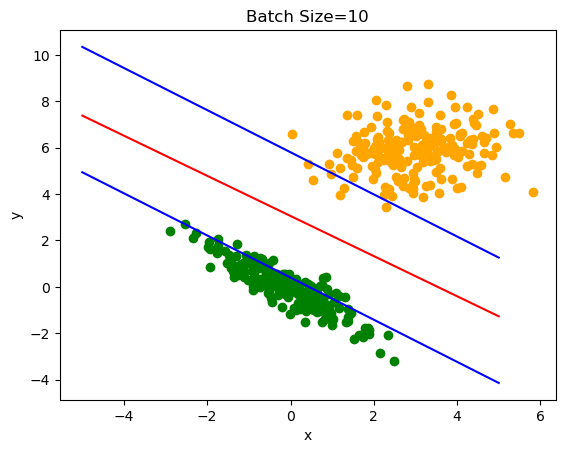

Number of iterations: 200


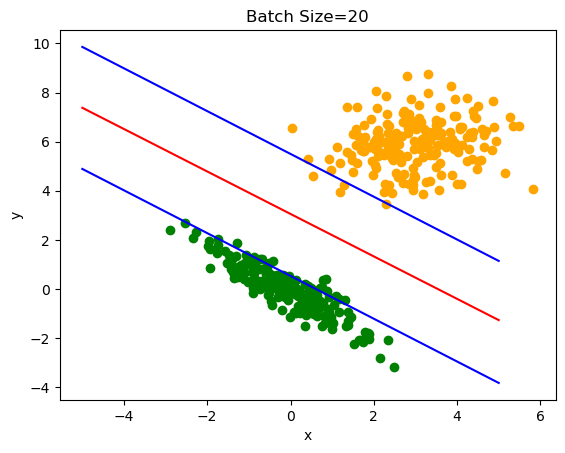

Number of iterations: 200


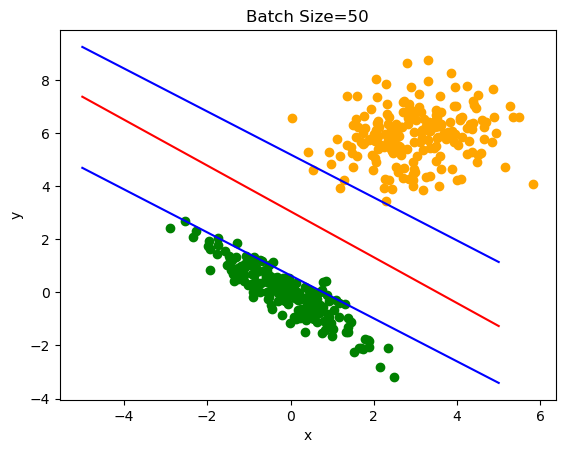

Number of iterations: 200


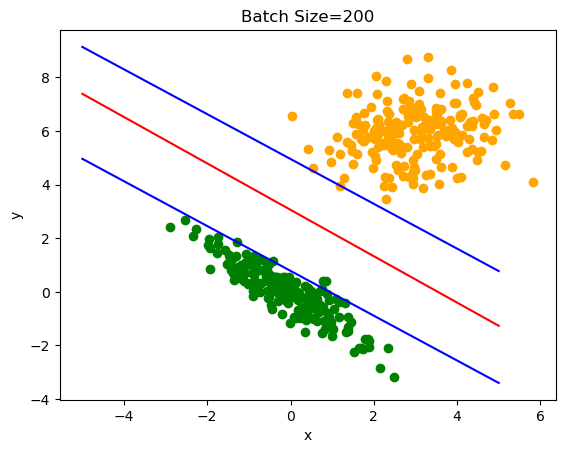

In [15]:
K = 200 # 200 points
X, y = generate_data(K)
for batch_size in [10, 20, 50, K]: # Batch = 200 means computing the gradient descent.
    # Mini batch
    z = mini_batch_SVM(x = X, y = y, itera = 200, batch_size = batch_size, mu0 = 1000, alpha = 0.01)
    print("Number of iterations:", z["iter"])

    # Linspace
    linx = np.linspace(-5, 5)
    zer = z['w']
    b = z['b']
    yy = -zer[0] / zer[1] * linx - (b) / zer[1]
    # Support vectors
    linv1 = -zer[0] / zer[1] * linx - (b+1) / zer[1]
    linv2 = -zer[0] / zer[1] * linx - (b-1) / zer[1]

    # Plot
    plt.plot(X.T[:K, 0], X.T[:K, 1], 'o', color = 'green')
    plt.plot(X.T[K:, 0], X.T[K:, 1], 'o', color = 'orange')
    plt.plot(linx, liny, color = 'red')
    plt.plot(linx, linv1, color = 'blue')
    plt.plot(linx, linv2, color = 'blue')
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.title(f'Batch Size={batch_size}')
    plt.show()

We can see that the result obtained is very similar to the one obtained with the Classical Stochastic Gradient Descent Method.

### Experiment 3. Perform plot of the logarithm

When working with parameter values for alpha and mu0, we see that the solutions are different but similar. All of them divide the two clusters perfectly, but some of them are more optimal than others.
To know which ones are better we could use the logarithm plot.

Text(0, 0.5, 'Logarithm')

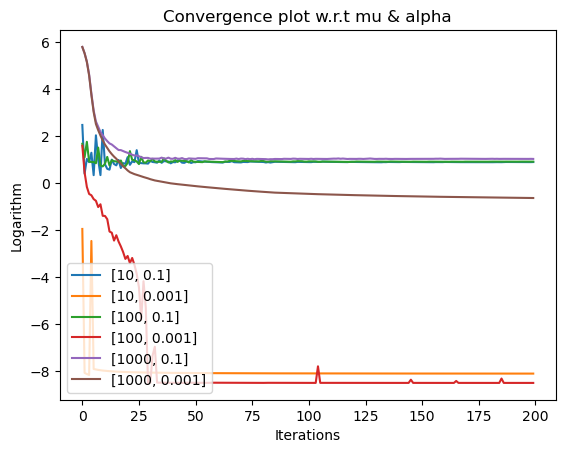

In [16]:
# Different mu's and alphas
mu0s = [10, 100, 1000]
alphas = [0.1, 0.001]

# We calculate the logarithms
for i in range(len(mu0s)):
    
    for j in range(len(alphas)):
        
        z = Stoch_SupportVectorMachine(x = X, y = y, itera = 200, mu0 = mu0s[i], alpha = alphas[j])
        plt.plot(np.log(z["acum"]), label = [mu0s[i], alphas[j]]) 
        
# Plot
plt.legend(loc="best")
plt.title("Convergence plot w.r.t mu & alpha")
plt.xlabel('Iterations') 
plt.ylabel('Logarithm') 

 We could say the best combinations of parameters (with the best convergence) are: mu0 = 100, alpha = 0.1 and mu0 = 1000, alpha = 0.1. This could have a relationship with alpha being equal to 0.1.

Text(0, 0.5, 'Logarithm')

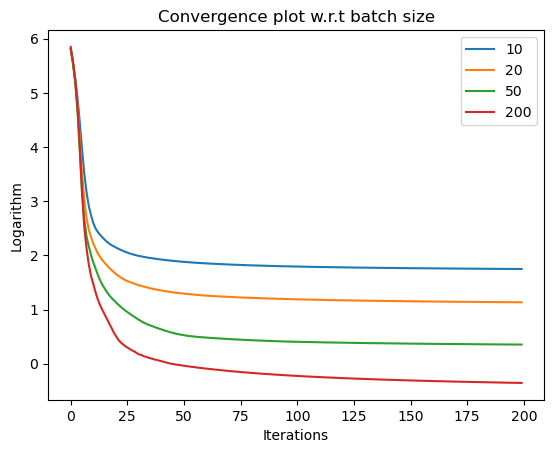

In [17]:
for batch_size in [10, 20, 50, K]:
    # Mini batch
    z = mini_batch_SVM(x = X, y = y, itera = 200, batch_size = batch_size, mu0 = 1000, alpha = 0.01)
    # Plot of the logarithm of the results
    plt.plot(np.log(z["acum"]), label = batch_size) 

# Plot
plt.legend(loc="best")
plt.title("Convergence plot w.r.t batch size")
plt.xlabel('Iterations') 
plt.ylabel('Logarithm') 

The first difference we may observe between both methods is that the mini-batch curves are way smoother than the SVM with SGD method. The use of mini-batches can affect the convergence rate of the optimization process. With small mini-batch sizes, the algorithm may require fewer iterations to converge, but it won't be able to find the global minimum of the objective function. On the other hand, with larger mini-batch sizes, the algorithm may require more iterations to converge, but may find a better solution. The choice of mini-batch size can therefore impact the efficiency and convergence rate of the optimization process for training an SVM.

### Conclusions. Comparisons between Dual and SGD/mini-Batch methods

In terms of convergence rate, SGD and mini-batch gradient descent can often converge faster than the dual method, because they make updates to the model parameters more frequently. However, the convergence rate can also depend on the specific characteristics of the dataset and the chosen parameter values.

In terms of robustness to noise, the dual method is generally more robust than SGD and mini-batch gradient descent, because it is based on the support vectors, which are the data points that are most influential in determining the hyperplane. SGD and mini-batch gradient descent may be more sensitive to noise, because they update the model parameters more frequently and may be influenced by outliers in the data.

Therefore, it may be appropriate to use the dual method when the dataset is large and the convergence rate is not a major concern, or when robustness to noise is a priority. On the other hand, SGD and mini-batch gradient descent may be more suitable when the dataset is small to medium-sized and the convergence rate is a major concern, or when the dataset is large and computational resources are limited.

It's worth noting that the optimization problem for an SVM is a convex quadratic optimization problem, which means that it has a unique global minimum. However, the numerical methods used to solve the problem may not always converge to the global minimum, depending on the initial parameter values and the convergence rate of the algorithm.